In [38]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup

# Criar as DataFrames com os colocados e não colocados
### Também criei DataFrames para cada tabela na pagina (Numero de vagas e numero de candidatos para cada mestrado)

In [39]:
def Nº_Ordem(T):

    if len(T.columns) < 2:

        lista_int = np.arange( len(T) )+1
        list_string  = map(str, lista_int) 
        lista_numero = list(list_string)


        for i in range(len(lista_numero)):
            lista_numero[i] = lista_numero[i] + 'º'

        T['Nº de ordem'] = lista_numero
        T = T[['Nº de ordem','Nomes dos candidatos' ]]
    return T

In [40]:
def Nº_Ordem_2(T):

    if len(T.columns) < 3:

        lista_int = np.arange( len(T) )+1
        list_string  = map(str, lista_int) 
        lista_numero = list(list_string)


        for i in range(len(lista_numero)):
            lista_numero[i] = lista_numero[i] + 'º'

        T['Nº de ordem'] = lista_numero
        T = T[['Nº de ordem','Nomes dos candidatos' ]]
    return T

In [41]:
#Criar lista de Mestrados
Mestrados_FCUP = ['Aplicações_em_Biotecnologia_e_Biologia_Sintética','Arquitetura_Paisagista','Astronomia_e_Astrofísica','Avaliação_e_Remediação_de_Solos','Biodiversidade_Genética_e_Evolução', 'Bioinformática_e_Biologia_Computacional', 'Biologia_Celular_e_Molecular', 'Biologia_e_Gestão_da_Qualidade_da_Água', 'Biologia_Funcional_e_Biotecnologia_de_Plantas', 'Bioquímica','Ciência_de_Computadores','Ciência_de_Dados','Ciência_e_Tecnologia_de_Nanomateriais','Ciências_do_Consumo_e_Nutrição','Ciências_e_Tecnologia_do_Ambiente','Deteção_Remota','Ecologia_e_Ambiente','Engenharia_Agronómica','Engenharia_de_Redes_e_Sistemas_Informáticos','Engenharia_de_Viticultura_e_Enologia','Engenharia_Física','Engenharia_Geográfica','Engenharia_Matemática','Ensino_de_Biologia_e_de_Geologia_no_3Ciclo_do_Ensino_Básico_e_no_Ensino_Secundário','Ensino_de_Física_e_de_Química_no_3Ciclo_do_Ensino_Básico_e_no_Ensino_Secundário','Ensino_de_Matemática_no_3_Ciclo_do_Ensino_Básico_e_no_Secundário','Ensino_e_Divulgação_das_Ciências','Física','Física_Médica','Genética_Forense','Geologia','Matemática','Métodos_Avançados_e_Acreditação_em_Análise_Química','Química','Recursos_Biológicos_Aquáticos','Segurança_Informática','Estatística_Computacional','Estatística_Computacional_e_Análise_de_Dados']
Mestrados_Engenharia = ['Bioengenharia','Ciência_da_Informação','Engenharia_Biomédica','Engenharia_Civil','Engenharia_de_Minas_e_Geo_Ambiente','Engenharia_de_Segurança_e_Higiene_Ocupacionais','Engenharia_de_Serviços_e_Gestão','Engenharia_de_Software','Engenharia_do_Ambiente','Engenharia_e_Ciência_de_Dados', 'Engenharia_e_Gestão_Industrial', 'Engenharia_Eletrotécnica_e_de_Computadores', 'Engenharia_Informática_e_Computação', 'Engenharia_Mecânica', 'Engenharia_Química', 'Estruturas_de_Engenharia_Civil', 'Gestão_da_Mobilidade_Urbana', 'Inovação_e_Empreendedorismo_Tecnológico', 'Mecânica_Computacional', 'Mecânica_dos_Solos_e_Engenharia_Geotécnica', 'Multimédia', 'Planeamento_e_Projecto_Urbano', 'Projeto_Integrado_na_Construção_de_Edifícios', 'Visão_por_Computador']
Mestrados = Mestrados_FCUP + Mestrados_Engenharia
Mestrados.sort()

#Criar DataFrames e Listas vazias para encher com o ciclo for
Colocados_df = pd.DataFrame()
N_Colocados_df = pd.DataFrame()

Colocados_list = []
N_Colocados_list = []

# Este d serve para guardar nomes diferentes para as variáveis no ciclo for
d = {}

for i in Mestrados:
    
    
    # Esta treta guarda a informação HTML que tenho na pasta de Mestrados, como uma lista de dataframes para cada HTML
    rfile  = open(r'./Mestrados//' +i+ '.html',encoding='latin-1')
    rsoup  = BeautifulSoup(rfile)
    soup_string = str(rsoup)

    dfs = pd.read_html(soup_string)
    
    Nº_Ordem(dfs[2])
    
    # Criar df para cada tablea para cada mestrado
    d["df_1_{0}".format(i)] = dfs[1]
    d["df_2_{0}".format(i)] = dfs[2].set_index('Nº de ordem')
    
    # Criar df com os nomes dos colocados em que cada coluna é o mestrado no qual foram colocados
    Colocados_list.append(dfs[2]['Nomes dos candidatos'])    
    Colocados_df = pd.concat([Colocados_df, pd.DataFrame({i : Colocados_list[len(Colocados_list)-1]})], axis=1) 
    
    #Se o numero de vagas for inferior ao numero de candidatos então:
    if dfs[1][1][0] < dfs[1][1][1]:
        
        Nº_Ordem_2(dfs[3])
        d["df_3_{0}".format(i)] = dfs[3].set_index('Nº de ordem')
        
        # Criar df com os nomes dos candidatos em que cada coluna é o mestrado no qual não foram colocados
        N_Colocados_list.append(dfs[3]['Nomes dos candidatos'])
        N_Colocados_df = pd.concat([N_Colocados_df, pd.DataFrame({i : N_Colocados_list[len(N_Colocados_list)-1]})], axis=1)

    else:
        N_Colocados_df[i] = np.nan

#Adicionar linhas vazias ao Colocados_df para ter o mesmo tamanho que N_Colocados_df
for i in range(8):
    Colocados_df.loc[Colocados_df.shape[0]] = [np.nan]*len(Mestrados)

# Seleciorar o Mestrado que prentende ver quais pessoas ficaram colocadas também noutro Mestrado e em que mestrado ficaram

In [42]:
Mestrados_FCUP = ['Aplicações_em_Biotecnologia_e_Biologia_Sintética','Arquitetura_Paisagista','Astronomia_e_Astrofísica','Avaliação_e_Remediação_de_Solos','Biodiversidade_Genética_e_Evolução', 'Bioinformática_e_Biologia_Computacional', 'Biologia_Celular_e_Molecular', 'Biologia_e_Gestão_da_Qualidade_da_Água', 'Biologia_Funcional_e_Biotecnologia_de_Plantas', 'Bioquímica','Ciência_de_Computadores','Ciência_de_Dados','Ciência_e_Tecnologia_de_Nanomateriais','Ciências_do_Consumo_e_Nutrição','Ciências_e_Tecnologia_do_Ambiente','Deteção_Remota','Ecologia_e_Ambiente','Engenharia_Agronómica','Engenharia_de_Redes_e_Sistemas_Informáticos','Engenharia_de_Viticultura_e_Enologia','Engenharia_Física','Engenharia_Geográfica','Engenharia_Matemática','Ensino_de_Biologia_e_de_Geologia_no_3Ciclo_do_Ensino_Básico_e_no_Ensino_Secundário','Ensino_de_Física_e_de_Química_no_3Ciclo_do_Ensino_Básico_e_no_Ensino_Secundário','Ensino_de_Matemática_no_3_Ciclo_do_Ensino_Básico_e_no_Secundário','Ensino_e_Divulgação_das_Ciências','Física','Física_Médica','Genética_Forense','Geologia','Matemática','Métodos_Avançados_e_Acreditação_em_Análise_Química','Química','Recursos_Biológicos_Aquáticos','Segurança_Informática','Estatística_Computacional','Estatística_Computacional_e_Análise_de_Dados']
Mestrados_Engenharia = ['Bioengenharia','Ciência_da_Informação','Engenharia_Biomédica','Engenharia_Civil','Engenharia_de_Minas_e_Geo_Ambiente','Engenharia_de_Segurança_e_Higiene_Ocupacionais','Engenharia_de_Serviços_e_Gestão','Engenharia_de_Software','Engenharia_do_Ambiente','Engenharia_e_Ciência_de_Dados', 'Engenharia_e_Gestão_Industrial', 'Engenharia_Eletrotécnica_e_de_Computadores', 'Engenharia_Informática_e_Computação', 'Engenharia_Mecânica', 'Engenharia_Química', 'Estruturas_de_Engenharia_Civil', 'Gestão_da_Mobilidade_Urbana', 'Inovação_e_Empreendedorismo_Tecnológico', 'Mecânica_Computacional', 'Mecânica_dos_Solos_e_Engenharia_Geotécnica', 'Multimédia', 'Planeamento_e_Projecto_Urbano', 'Projeto_Integrado_na_Construção_de_Edifícios', 'Visão_por_Computador']
Mestrados = Mestrados_FCUP + Mestrados_Engenharia
Mestrados.sort()

#Escolher o Mestrado que quer
Mestrado = 'Física'


list1 = Colocados_df[Mestrado].dropna().tolist()
Mestrados.remove(Mestrado)
Lista = []

for i in Mestrados:
    list2 = Colocados_df[i].dropna().tolist()
    List = list(set(list1).intersection(list2))
    # print(i)
    # print(List)
    # print('')
    
    Lista = Lista + List


Lista_Serie = pd.Series(Lista)

        
print('')
print('')
print('Alunos que ficaram colocados em outros mestrados além do Mestrado em', Mestrado,':')
print('')
print(Lista_Serie.unique()) ### ESTA LISTA DICIONARIO
print('')
print('São', len(Lista_Serie.unique()), 'no total')



Alunos que ficaram colocados em outros mestrados além do Mestrado em Física :

[]

São 0 no total


/home/jx23/.local/lib/python3.6/site-packages/ipykernel_launcher.py:24: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


# Seleciorar o Mestrado que prentende ver quais pessoas não ficaram colocadas mas que se candidataram e ficaram colocadas noutro Mestrado

In [43]:
Mestrados_FCUP = ['Aplicações_em_Biotecnologia_e_Biologia_Sintética','Arquitetura_Paisagista','Astronomia_e_Astrofísica','Avaliação_e_Remediação_de_Solos','Biodiversidade_Genética_e_Evolução', 'Bioinformática_e_Biologia_Computacional', 'Biologia_Celular_e_Molecular', 'Biologia_e_Gestão_da_Qualidade_da_Água', 'Biologia_Funcional_e_Biotecnologia_de_Plantas', 'Bioquímica','Ciência_de_Computadores','Ciência_de_Dados','Ciência_e_Tecnologia_de_Nanomateriais','Ciências_do_Consumo_e_Nutrição','Ciências_e_Tecnologia_do_Ambiente','Deteção_Remota','Ecologia_e_Ambiente','Engenharia_Agronómica','Engenharia_de_Redes_e_Sistemas_Informáticos','Engenharia_de_Viticultura_e_Enologia','Engenharia_Física','Engenharia_Geográfica','Engenharia_Matemática','Ensino_de_Biologia_e_de_Geologia_no_3Ciclo_do_Ensino_Básico_e_no_Ensino_Secundário','Ensino_de_Física_e_de_Química_no_3Ciclo_do_Ensino_Básico_e_no_Ensino_Secundário','Ensino_de_Matemática_no_3_Ciclo_do_Ensino_Básico_e_no_Secundário','Ensino_e_Divulgação_das_Ciências','Física','Física_Médica','Genética_Forense','Geologia','Matemática','Métodos_Avançados_e_Acreditação_em_Análise_Química','Química','Recursos_Biológicos_Aquáticos','Segurança_Informática','Estatística_Computacional','Estatística_Computacional_e_Análise_de_Dados']
Mestrados_Engenharia = ['Bioengenharia','Ciência_da_Informação','Engenharia_Biomédica','Engenharia_Civil','Engenharia_de_Minas_e_Geo_Ambiente','Engenharia_de_Segurança_e_Higiene_Ocupacionais','Engenharia_de_Serviços_e_Gestão','Engenharia_de_Software','Engenharia_do_Ambiente','Engenharia_e_Ciência_de_Dados', 'Engenharia_e_Gestão_Industrial', 'Engenharia_Eletrotécnica_e_de_Computadores', 'Engenharia_Informática_e_Computação', 'Engenharia_Mecânica', 'Engenharia_Química', 'Estruturas_de_Engenharia_Civil', 'Gestão_da_Mobilidade_Urbana', 'Inovação_e_Empreendedorismo_Tecnológico', 'Mecânica_Computacional', 'Mecânica_dos_Solos_e_Engenharia_Geotécnica', 'Multimédia', 'Planeamento_e_Projecto_Urbano', 'Projeto_Integrado_na_Construção_de_Edifícios', 'Visão_por_Computador']
Mestrados = Mestrados_FCUP + Mestrados_Engenharia
Mestrados.sort()

#Escolher o Mestrado que quer
Mestrado = 'Estatística_Computacional_e_Análise_de_Dados'


list1 = N_Colocados_df[Mestrado].dropna().tolist()
Mestrados.remove(Mestrado)
Lista = []

for i in Mestrados:
    list2 = Colocados_df[i].dropna().tolist()
    List = list(set(list1).intersection(list2))
    # print(i)
    # print(List)
    # print('')
    
    Lista = Lista + List


Lista_Serie = pd.Series(Lista)

        
print('')
print('')
print('Alunos que não ficaram colocados neste mestrado (', Mestrado, ') mas ficaram em outros:')
print('')
print(Lista_Serie.unique()) ### ESTA LISTA DICIONARIO
print('')
print('São', len(Lista_Serie.unique()), 'no total')



Alunos que não ficaram colocados neste mestrado ( Estatística_Computacional_e_Análise_de_Dados ) mas ficaram em outros:

['Bruno Filipe Ferreira Assunção Oliveira' 'Maria Pedroso da Silva'
 'João Tiago Moreira Ferreira da Mota' 'João Jesus Figueiredo'
 'João Pedro da Costa Sousa' 'Xavier Branco Ribeiro'
 'Alex dos Santos Magalhães' 'José Gil Faria Dias']

São 8 no total


# Saber se uma pessoa em especifio ficou colocada ou não aos mestrados que se candidatou

In [44]:
Mestrados_FCUP = ['Aplicações_em_Biotecnologia_e_Biologia_Sintética','Arquitetura_Paisagista','Astronomia_e_Astrofísica','Avaliação_e_Remediação_de_Solos','Biodiversidade_Genética_e_Evolução', 'Bioinformática_e_Biologia_Computacional', 'Biologia_Celular_e_Molecular', 'Biologia_e_Gestão_da_Qualidade_da_Água', 'Biologia_Funcional_e_Biotecnologia_de_Plantas', 'Bioquímica','Ciência_de_Computadores','Ciência_de_Dados','Ciência_e_Tecnologia_de_Nanomateriais','Ciências_do_Consumo_e_Nutrição','Ciências_e_Tecnologia_do_Ambiente','Deteção_Remota','Ecologia_e_Ambiente','Engenharia_Agronómica','Engenharia_de_Redes_e_Sistemas_Informáticos','Engenharia_de_Viticultura_e_Enologia','Engenharia_Física','Engenharia_Geográfica','Engenharia_Matemática','Ensino_de_Biologia_e_de_Geologia_no_3Ciclo_do_Ensino_Básico_e_no_Ensino_Secundário','Ensino_de_Física_e_de_Química_no_3Ciclo_do_Ensino_Básico_e_no_Ensino_Secundário','Ensino_de_Matemática_no_3_Ciclo_do_Ensino_Básico_e_no_Secundário','Ensino_e_Divulgação_das_Ciências','Física','Física_Médica','Genética_Forense','Geologia','Matemática','Métodos_Avançados_e_Acreditação_em_Análise_Química','Química','Recursos_Biológicos_Aquáticos','Segurança_Informática','Estatística_Computacional','Estatística_Computacional_e_Análise_de_Dados']
Mestrados_Engenharia = ['Bioengenharia','Ciência_da_Informação','Engenharia_Biomédica','Engenharia_Civil','Engenharia_de_Minas_e_Geo_Ambiente','Engenharia_de_Segurança_e_Higiene_Ocupacionais','Engenharia_de_Serviços_e_Gestão','Engenharia_de_Software','Engenharia_do_Ambiente','Engenharia_e_Ciência_de_Dados', 'Engenharia_e_Gestão_Industrial', 'Engenharia_Eletrotécnica_e_de_Computadores', 'Engenharia_Informática_e_Computação', 'Engenharia_Mecânica', 'Engenharia_Química', 'Estruturas_de_Engenharia_Civil', 'Gestão_da_Mobilidade_Urbana', 'Inovação_e_Empreendedorismo_Tecnológico', 'Mecânica_Computacional', 'Mecânica_dos_Solos_e_Engenharia_Geotécnica', 'Multimédia', 'Planeamento_e_Projecto_Urbano', 'Projeto_Integrado_na_Construção_de_Edifícios', 'Visão_por_Computador']
Mestrados = Mestrados_FCUP + Mestrados_Engenharia
Mestrados.sort()

#Escolher a pessoa a ver
Nome = 'Danilo Garcia Brandão'

for i in Mestrados:
    
    if Nome in N_Colocados_df[i].dropna().tolist():        
        print(Nome, 'candidatou-se a', i, 'mas não ficou colocado')
    
    if Nome in Colocados_df[i].dropna().tolist():       
        print(Nome, 'candidatou-se a', i, 'e ficou colocado')
    

Danilo Garcia Brandão candidatou-se a Engenharia_e_Ciência_de_Dados e ficou colocado


# Sobrantes em todos os Mestrados

In [45]:
Mestrados_FCUP = ['Aplicações_em_Biotecnologia_e_Biologia_Sintética','Arquitetura_Paisagista','Astronomia_e_Astrofísica','Avaliação_e_Remediação_de_Solos','Biodiversidade_Genética_e_Evolução', 'Bioinformática_e_Biologia_Computacional', 'Biologia_Celular_e_Molecular', 'Biologia_e_Gestão_da_Qualidade_da_Água', 'Biologia_Funcional_e_Biotecnologia_de_Plantas', 'Bioquímica','Ciência_de_Computadores','Ciência_de_Dados','Ciência_e_Tecnologia_de_Nanomateriais','Ciências_do_Consumo_e_Nutrição','Ciências_e_Tecnologia_do_Ambiente','Deteção_Remota','Ecologia_e_Ambiente','Engenharia_Agronómica','Engenharia_de_Redes_e_Sistemas_Informáticos','Engenharia_de_Viticultura_e_Enologia','Engenharia_Física','Engenharia_Geográfica','Engenharia_Matemática','Ensino_de_Biologia_e_de_Geologia_no_3Ciclo_do_Ensino_Básico_e_no_Ensino_Secundário','Ensino_de_Física_e_de_Química_no_3Ciclo_do_Ensino_Básico_e_no_Ensino_Secundário','Ensino_de_Matemática_no_3_Ciclo_do_Ensino_Básico_e_no_Secundário','Ensino_e_Divulgação_das_Ciências','Física','Física_Médica','Genética_Forense','Geologia','Matemática','Métodos_Avançados_e_Acreditação_em_Análise_Química','Química','Recursos_Biológicos_Aquáticos','Segurança_Informática','Estatística_Computacional','Estatística_Computacional_e_Análise_de_Dados']
Mestrados_Engenharia = ['Bioengenharia','Ciência_da_Informação','Engenharia_Biomédica','Engenharia_Civil','Engenharia_de_Minas_e_Geo_Ambiente','Engenharia_de_Segurança_e_Higiene_Ocupacionais','Engenharia_de_Serviços_e_Gestão','Engenharia_de_Software','Engenharia_do_Ambiente','Engenharia_e_Ciência_de_Dados', 'Engenharia_e_Gestão_Industrial', 'Engenharia_Eletrotécnica_e_de_Computadores', 'Engenharia_Informática_e_Computação', 'Engenharia_Mecânica', 'Engenharia_Química', 'Estruturas_de_Engenharia_Civil', 'Gestão_da_Mobilidade_Urbana', 'Inovação_e_Empreendedorismo_Tecnológico', 'Mecânica_Computacional', 'Mecânica_dos_Solos_e_Engenharia_Geotécnica', 'Multimédia', 'Planeamento_e_Projecto_Urbano', 'Projeto_Integrado_na_Construção_de_Edifícios', 'Visão_por_Computador']
Mestrados = Mestrados_FCUP + Mestrados_Engenharia
Mestrados.sort()


Candidaturas_list = []
Sobram_list = []
Vagas_list = []

for i in Mestrados:
    
    rfile  = open(r'./Mestrados/' +i+ '.html',encoding='latin-1')
    rsoup  = BeautifulSoup(rfile)
    soup_string = str(rsoup)
    dfs = pd.read_html(soup_string) 
    
    Vagas = dfs[1][1][0]
    Candidaturas = dfs[1][1][1]
    
    Vagas_list.append(Vagas)
    Candidaturas_list.append(Candidaturas)
    

    Sobras = Vagas - Candidaturas
    
    
    if Sobras < 0:
    
        Sobram_list.append(0)
        
    else:
        Sobram_list.append(Sobras)
        


In [46]:
converter = lambda x: x.replace('_', ' ')
Mestrados_ = list(map(converter, Mestrados))


Mestrados_Serie = pd.Series(Mestrados_)
Sobram_Serie = pd.Series(Sobram_list)
Candidaturas_Serie = pd.Series(Candidaturas_list)
Vagas_Serie = pd.Series(Vagas_list)


frame = { 'Mestrado': Mestrados_Serie, 'Sobrantes': Sobram_Serie, 'Candidaturas': Candidaturas_Serie, 'Vagas': Vagas_Serie }
  
df1 = pd.DataFrame(frame)
Sobrantes_df = df1.sort_values('Sobrantes').set_index('Mestrado')

In [47]:
Sobrantes_df

,Sobrantes,Candidaturas,Vagas
Mestrado,,,
Visão por Computador,0,4,3
Segurança Informática,0,37,26
Engenharia Química,0,20,20
Engenharia Mecânica,0,35,30
Engenharia Matemática,0,24,22
...,...,...,...
Geologia,18,4,22
Ensino de Biologia e de Geologia no 3Ciclo do Ensino Básico e no Ensino Secundário,21,9,30
Mecânica Computacional,23,2,25


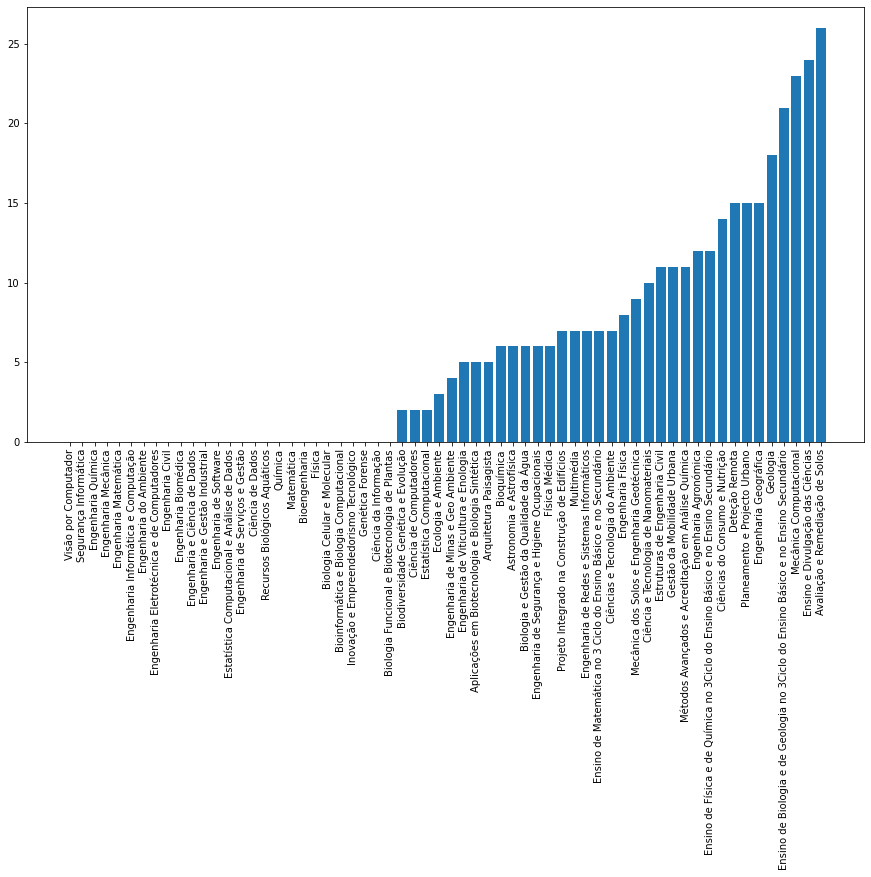

In [48]:
#Sobrantes_df.plot.bar(figsize=(15,8))

plt.figure(figsize=(15,8))
plt.bar(Sobrantes_df.index, Sobrantes_df['Sobrantes'])
plt.xticks(rotation=90)
plt.show()

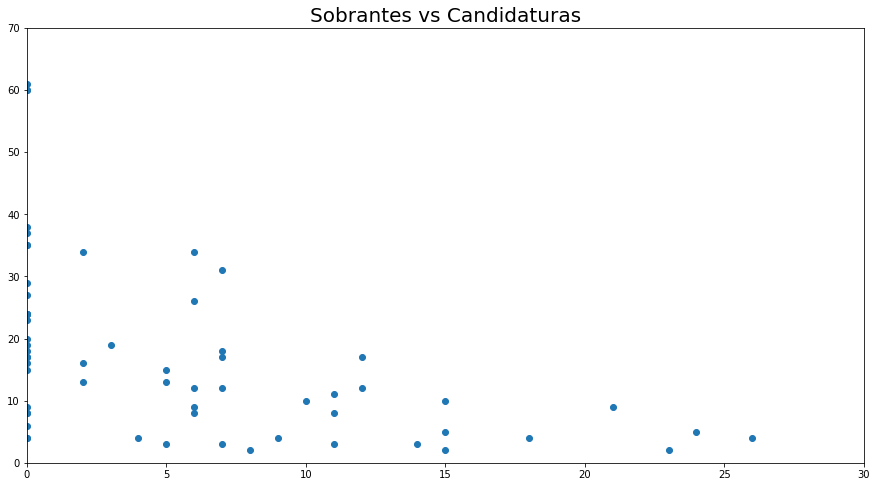

In [49]:
plt.figure(figsize=(15,8))
plt.title('Sobrantes vs Candidaturas', fontsize= 20)

plt.scatter(Sobrantes_df['Sobrantes'], Sobrantes_df['Candidaturas'])
plt.xlim(0,30)
plt.ylim(0,70)
plt.show()

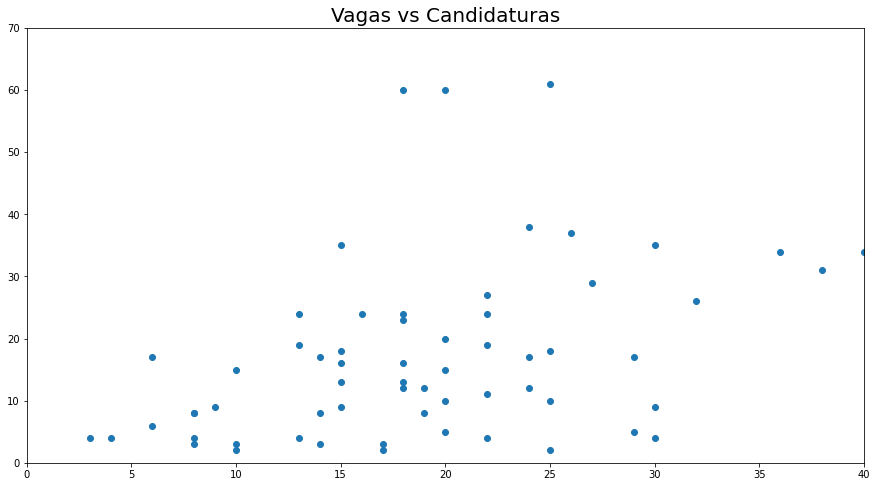

In [50]:
plt.figure(figsize=(15,8))
plt.title('Vagas vs Candidaturas', fontsize= 20)

plt.scatter(Sobrantes_df['Vagas'], Sobrantes_df['Candidaturas'])
plt.xlim(0,40)
plt.ylim(0,70)
plt.show()

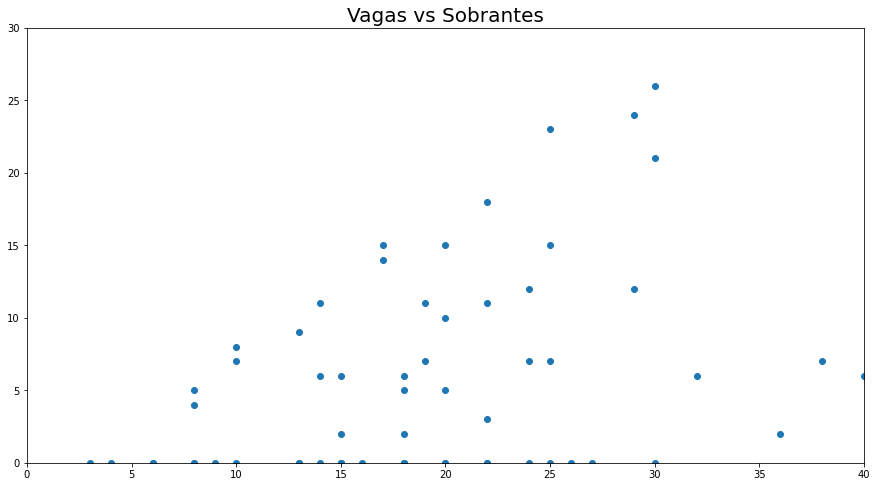

In [51]:
plt.figure(figsize=(15,8))
plt.title('Vagas vs Sobrantes', fontsize= 20)

plt.scatter(Sobrantes_df['Vagas'], Sobrantes_df['Sobrantes'])
plt.xlim(0,40)
plt.ylim(0,30)
plt.show()

In [52]:
df_sup = pd.DataFrame({'A': [0, 1, 2, 3, 4],
                   'B': [5, 6, 7, 8, 9],
                   'C': ['a', 'b', 'c--', 'd', 'e']})
df_lol = pd.DataFrame({'J': [1000, 1, 2, 3, 4],
                   'B': [5, 6, 7, 8, 9],
                   'C': ['a', 'b', 'c--', 'd', 'e']})

lista = [["sup",df_sup],["lol",df_lol]]


In [53]:
df_sup.columns

Index(['A', 'B', 'C'], dtype='object')